In [1]:
import pandas as pd

In [2]:
dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0)

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

In [5]:
df=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0])

In [6]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df['date'].dtype

dtype('<M8[ns]')

In [8]:
series=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0],index_col=0,squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [10]:
series.shape

(365,)

In [11]:
df.shape

(365, 2)

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [14]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df2=df.copy()

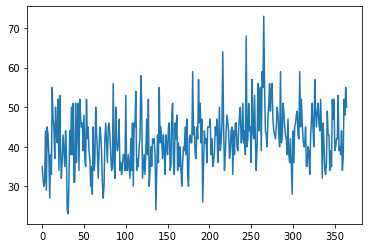

In [17]:
df['births'].plot()

In [18]:
df2.index=df2['date']

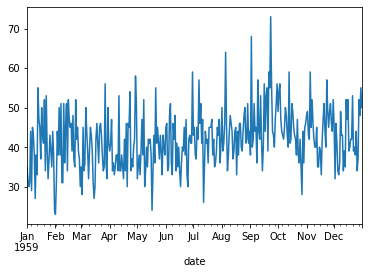

In [19]:
df2['births'].plot()

In [20]:
data_df2=df2[(df2['date']>'1959-01-01')&(df2['date']<='1959-01-10')].copy()

In [21]:
data_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


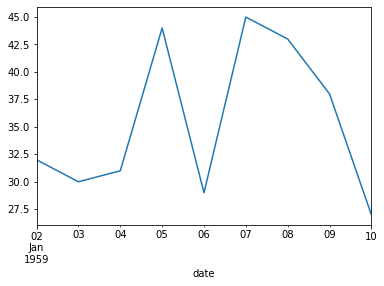

In [22]:
data_df2['births'].plot()

In [23]:
import seaborn as sns

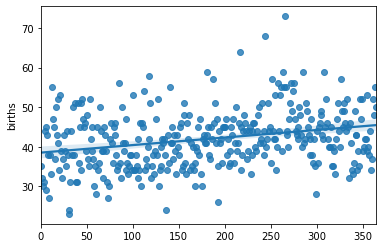

In [24]:
sns.regplot(x=df.index.values,y=df['births'])

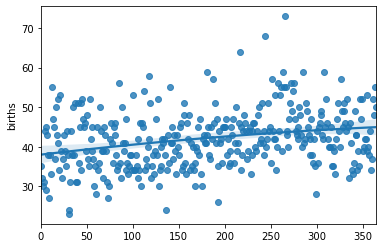

In [25]:
sns.regplot(x=df.index.values,y=df['births'],order=2)

In [26]:
miles_df=pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [27]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


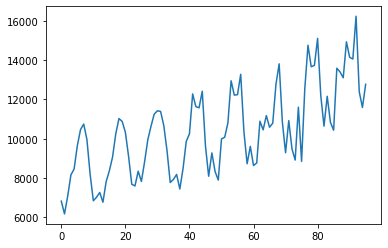

In [28]:
miles_df['MilesMM'].plot()

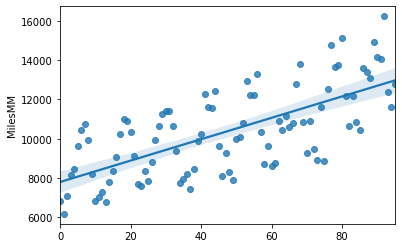

In [29]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

In [30]:
miles_df['year']=miles_df["Month"].dt.year

In [31]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [32]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

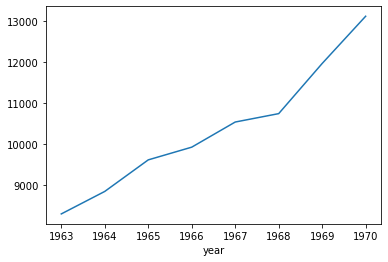

In [33]:
miles_df.groupby('year')['MilesMM'].mean().plot()

In [34]:
miles_df['lag1']=miles_df["MilesMM"].shift(1)

In [35]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


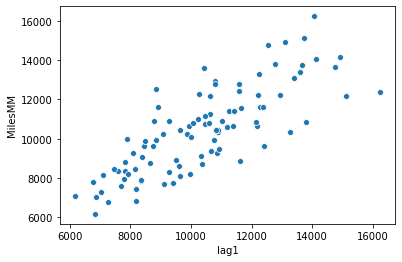

In [36]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [37]:
from pandas.plotting import lag_plot, autocorrelation_plot

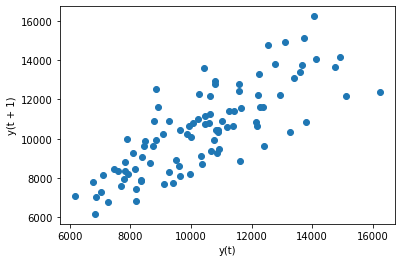

In [38]:
lag_plot(miles_df['MilesMM'])

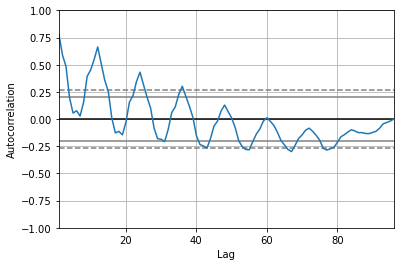

In [39]:
autocorrelation_plot(miles_df['MilesMM'])

feature engineering

In [40]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [41]:
feature=df.copy()

In [42]:
feature['year']=df['date'].dt.year
feature['month']=df['date'].dt.month
feature['day']=df['date'].dt.day

In [43]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [44]:
feature.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [45]:
feature['lag1']=df['births'].shift(1)

In [46]:
feature['lag2']=df['births'].shift(365)

In [47]:
feature.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


window features

In [48]:
feature['roll_mean']=df['births'].rolling(window=2).mean()

In [49]:
feature.head()

,date,births,year,month,day,lag1,lag2,roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [50]:
feature['roll_max']=df['births'].rolling(window=3).max()

In [51]:
feature.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


Expanding features

In [52]:
feature['expand_max']=df['births'].expanding().max()

In [53]:
feature.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


Downsampling and Upsampling

In [54]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [55]:
quaterly_miles_df=miles_df.resample('Q',on='Month').mean()

In [56]:
quaterly_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


In [57]:
year_total_miles=miles_df.resample('A',on='Month').sum()

In [58]:
year_total_miles.head()

,MilesMM,year,lag1
Month,,,
1963-12-31,99603,23556,92576.0
1964-12-31,106192,23568,105617.0
1965-12-31,115431,23580,115100.0
1966-12-31,119154,23592,117807.0
1967-12-31,126515,23604,126181.0


In [59]:
upsample_miles_df=miles_df.resample('D',on='Month').mean()

In [60]:
upsample_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN


In [61]:
interpolated_miles_df=upsample_miles_df.interpolate(method='linear')

In [62]:
interpolated_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.0,NaN
1963-01-02,6806.064516,1963.0,NaN
1963-01-03,6785.129032,1963.0,NaN
1963-01-04,6764.193548,1963.0,NaN
1963-01-05,6743.258065,1963.0,NaN


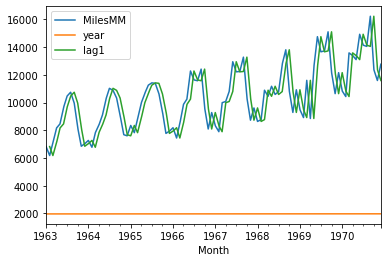

In [63]:
interpolated_miles_df.plot()

decomposing time series

additive model
y=trend +level+seasonality+noise

multiplicative model 
y=leveltrendseasonality*noise

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
miles_decompose=pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [66]:
miles_decompose.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [67]:
miles_decompose.index=miles_decompose['Month']

In [68]:
result=seasonal_decompose(miles_decompose['MilesMM'],model='additive')

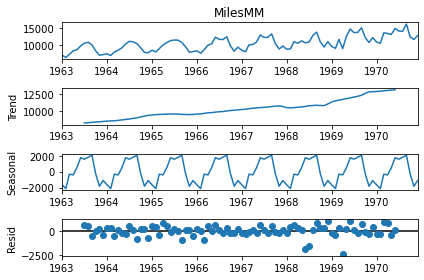

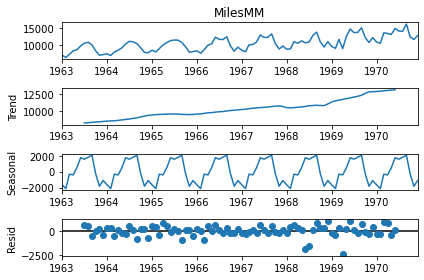

In [69]:
result.plot()

In [70]:
result2=seasonal_decompose(miles_decompose['MilesMM'],model='multiplicative')

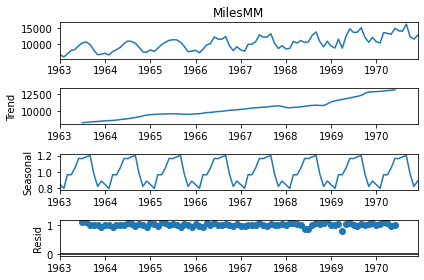

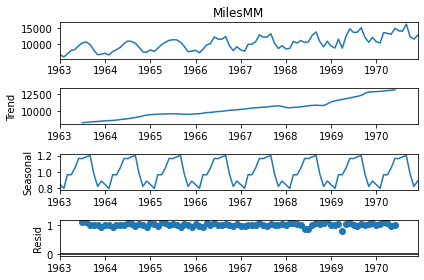

In [71]:
result2.plot()

Differencing 

In [72]:
miles_df=pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [73]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [74]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [75]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [76]:
miles_df['MilesMM_diff_1']=miles_df['MilesMM'].diff(periods=1)

In [77]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


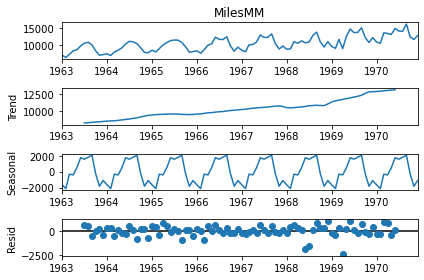

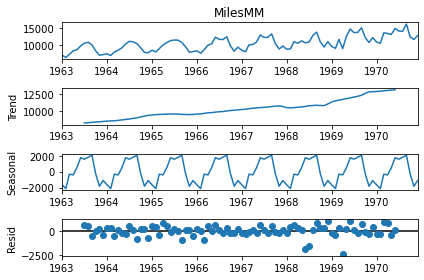

In [78]:
miles_df.index=miles_df['Month']
result_a=seasonal_decompose(miles_df['MilesMM'],model='additive')
result_a.plot()

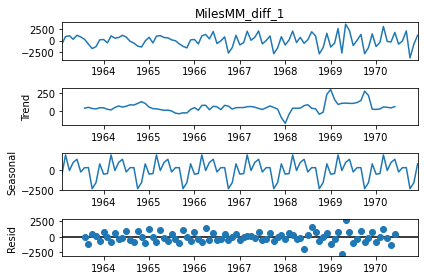

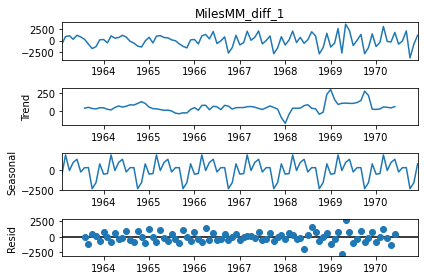

In [79]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df.iloc[1:,3],model='additive')
result_b.plot()

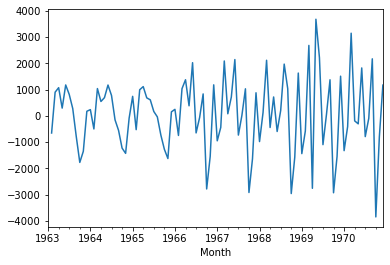

In [80]:
miles_df['MilesMM_diff_1'].plot()

In [81]:
miles_df['MilesMM_diff_2']=miles_df['MilesMM_diff_1'].diff(periods=12)

In [82]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_2
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


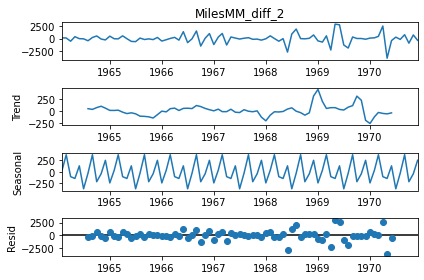

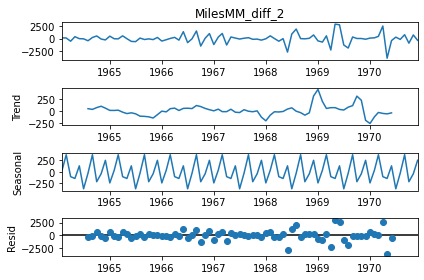

In [83]:

result_c=seasonal_decompose(miles_df.iloc[13:,4],model='additive')
result_c.plot()

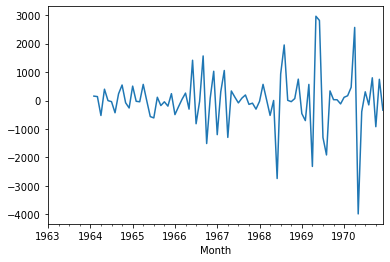

In [84]:
miles_df['MilesMM_diff_2'].plot()

Test Train split

In [85]:
temp_df=pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=[0])

In [86]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [87]:
temp_df.shape

(3650, 2)

In [88]:
temp_df.shape[0]

3650

In [89]:
train_size=int(temp_df.shape[0]*0.8)
train_size

2920

In [90]:
train=temp_df[0:train_size]

In [91]:
test=temp_df[train_size:]

In [92]:
train.shape

(2920, 2)

In [93]:
test.shape

(730, 2)

persistance model

In [94]:
df=pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=[0])

In [95]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [96]:
df['t']=df['Temp'].shift(1)

In [97]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [98]:
train,test=df[1:df.shape[0]-7],df[1:df.shape[0]-7:]

In [99]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [100]:
train_x,train_y=train['t'],train['Temp']
test_x,test_y=test['t'],test['Temp']

In [101]:
prediction=test_x.copy()

In [102]:
print(prediction)
print(test_y)

1       20.7
2       17.9
3       18.8
4       14.6
5       15.8
        ... 
3638    14.7
3639    15.4
3640    13.1
3641    13.2
3642    13.9
Name: t, Length: 3642, dtype: float64
1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64


In [103]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y,prediction)
mse

7.467207578253706

In [104]:
import matplotlib.pyplot as plt

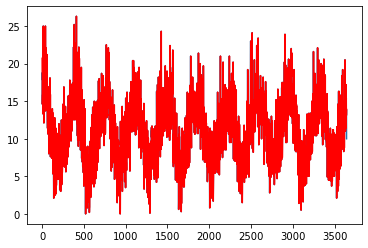

In [105]:
test_y.plot()
prediction.plot(color='red')

auto regression model

In [106]:
df=pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=[0])

In [107]:
train,test=df.Temp[1:df.shape[0]-7],df.Temp[df.shape[0]-7:]

In [108]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [109]:
test.head()

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
Name: Temp, dtype: float64

In [110]:
from statsmodels.tsa.ar_model import AR

In [111]:
model1=AR(train)
model1_fit=model1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


no of lag variables

In [112]:
model1_fit.k_ar

29

coef of lag variables

In [113]:
model1_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [114]:
predictions=model1_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [115]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [116]:
predictions.iloc[0]

11.871274847727827

In [117]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,predictions)
mse

1.5015252310069953

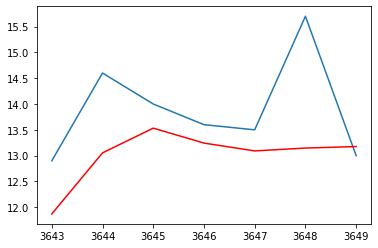

In [118]:
test.plot()
predictions.plot(color='red')

walk forward 

In [119]:
df=pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=[0])


In [120]:
train,test=df.Temp[1:df.shape[0]-7],df.Temp[df.shape[0]-7:]

In [121]:
data=train
predict=[]
for t in test:
    model=AR(data)
    model1.fit=model1.fit()
    y=model1_fit.predict(start=len(data),end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data=pd.Series(data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


11.871274847727827


TypeError: 'ARResultsWrapper' object is not callable

moving avergage model

In [122]:
df=pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=[0])

In [123]:
df['t']=df['Temp'].shift(1)

In [124]:
df['resid']=df['Temp']-df['t']

In [125]:
df.head()

,Date,Temp,t,resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [127]:
train,test=df.resid[1:df.shape[0]-7],df.resid[df.shape[0]-7:]

In [128]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: resid, dtype: float64

In [129]:
from statsmodels.tsa.ar_model import AR

In [130]:
model=AR(train)
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [131]:
model_fit.k_ar

29

In [132]:
model_fit.params

const       -0.006415
L1.resid    -0.407139
L2.resid    -0.496194
L3.resid    -0.445747
L4.resid    -0.403706
L5.resid    -0.362528
L6.resid    -0.334810
L7.resid    -0.288468
L8.resid    -0.274281
L9.resid    -0.235333
L10.resid   -0.234799
L11.resid   -0.228532
L12.resid   -0.208608
L13.resid   -0.180324
L14.resid   -0.178425
L15.resid   -0.152265
L16.resid   -0.143617
L17.resid   -0.132501
L18.resid   -0.097075
L19.resid   -0.104927
L20.resid   -0.079371
L21.resid   -0.059348
L22.resid   -0.045921
L23.resid   -0.063197
L24.resid   -0.063441
L25.resid   -0.045061
L26.resid   -0.023578
L27.resid   -0.011882
L28.resid   -0.003789
L29.resid   -0.003422
dtype: float64

In [133]:
pred_resid=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [134]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [136]:
predictions=df.t[df.shape[0]-7:]+pred_resid

In [137]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [139]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,predictions)
mse

191.38293418749885

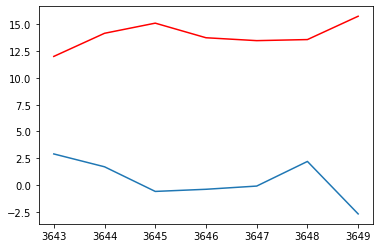

In [143]:
test.plot()
predictions.plot(color='red')